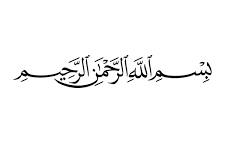

#**Import Libraries**

In [3]:
# Import necessary libraries
import pandas as pd

#**Load Arabic and English Dataset**

In [4]:

english_quran = pd.read_csv('/content/Quran_English.csv')  # Replace with actual file path
arabic_quran = pd.read_csv('/content/Arabic-Original.csv')


# Split Arabic Data into Surah, Ayah, and Text

In [5]:
# Split the column into 3 parts: Surah, Ayah, and Arabic text
arabic_quran[['Surah', 'Ayah', 'Text']] = arabic_quran['1|1|بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ'].str.split('|', expand=True)

# Drop the original combined column if it's no longer needed
arabic_quran.drop(columns=['1|1|بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ'], inplace=True)

# Inspect the data to ensure it's loaded correctly
print(english_quran.head())
print(arabic_quran.head())


          Name  Surah  Ayat                                              Verse
0  The Opening      1     1  In the name of Allah, the Beneficent, the Merc...
1  The Opening      1     2            Praise be to Allah, Lord of the Worlds,
2  The Opening      1     3                      The Beneficent, the Merciful.
3  The Opening      1     4                      Owner of the Day of Judgment,
4  The Opening      1     5  Thee (alone) we worship; Thee (alone) we ask f...
  Surah Ayah                                      Text
0     1    2     الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
1     1    3                   الرَّحْمَٰنِ الرَّحِيمِ
2     1    4                   مَالِكِ يَوْمِ الدِّينِ
3     1    5  إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ
4     1    6        اهْدِنَا الصِّرَاطَ الْمُسْتَقِيمَ


#Search Function

In [6]:
# Function to search for a query in the English Quran
def search_quran(query, english_df, arabic_df):
    # Find matching verses in the English translation (case-insensitive search)
    matched_verses = english_df[english_df['Verse'].str.contains(query, case=False)]

    if matched_verses.empty:
        return "No matching verse found."

    results = []

    # Iterate through matched verses and find corresponding Arabic verses
    for _, row in matched_verses.iterrows():
        surah = row['Surah']
        ayah = row['Ayat']
        english_text = row['Verse']

        # Find the corresponding Arabic verse using Surah and Ayah
        arabic_text = arabic_df[(arabic_df['Surah'] == str(surah)) & (arabic_df['Ayah'] == str(ayah))]['Text'].values

        if arabic_text:
            arabic_text = arabic_text[0]  # Get the first match
        else:
            arabic_text = "Arabic verse not found."

        results.append({
            'Surah': surah,
            'Ayah': ayah,
            'English': english_text,
            'Arabic': arabic_text
        })

    return results


#Display Function

In [7]:
# Function to display results
def display_results(results):
    if isinstance(results, str):  # No matches
        print(results)
    else:
        for result in results:
            print(f"Surah: {result['Surah']}, Ayah: {result['Ayah']}")
            print(f"English: {result['English']}")
            print(f"Arabic: {result['Arabic']}\n")


#Perform Search and Display Results

In [8]:
# Example user query
query = input("Enter a phrase to search in the Quran: ")

# Perform search and display results
results = search_quran(query, english_quran, arabic_quran)
display_results(results)


Enter a phrase to search in the Quran: women
Surah: 2, Ayah: 49
English: And (remember) when We did deliver you from Pharaoh’s folk, who were afflicting you with dreadful torment, slaying your sons and sparing your women: that was a tremendous trial from your Lord.
Arabic: وَإِذْ نَجَّيْنَاكُمْ مِنْ آلِ فِرْعَوْنَ يَسُومُونَكُمْ سُوءَ الْعَذَابِ يُذَبِّحُونَ أَبْنَاءَكُمْ وَيَسْتَحْيُونَ نِسَاءَكُمْ ۚ وَفِي ذَٰلِكُمْ بَلَاءٌ مِنْ رَبِّكُمْ عَظِيمٌ

Surah: 2, Ayah: 222
English: They question thee (O Muhammad) concerning menstruation. Say: It is an illness, so let women alone at such times and go not in unto them till they are cleansed. And when they have purified themselves, then go in unto them as Allah hath enjoined upon you. Truly Allah loveth those who turn unto Him, and loveth those who have a care for cleanness.
Arabic: وَيَسْأَلُونَكَ عَنِ الْمَحِيضِ ۖ قُلْ هُوَ أَذًى فَاعْتَزِلُوا النِّسَاءَ فِي الْمَحِيضِ ۖ وَلَا تَقْرَبُوهُنَّ حَتَّىٰ يَطْهُرْنَ ۖ فَإِذَا تَطَهَّرْنَ فَأْتُوهُ

In [9]:
# Example user query
query = input("Enter a phrase to search in the Quran: ")

# Perform search and display results
results = search_quran(query, english_quran, arabic_quran)
display_results(results)

Enter a phrase to search in the Quran: allah


<ipython-input-6-94f0730b1df6>:20: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if arabic_text:


Streaming output truncated to the last 5000 lines.
Surah: 8, Ayah: 19
English: (O Qureysh!) If ye sought a judgment, now hath the judgment come unto you. And if ye cease (from persecuting the believers) it will be better for you, but if ye return (to the attack) We also shall return. And your host will avail you naught, however numerous it be, and (know) that Allah is with the believers (in His Guidance).
Arabic: إِنْ تَسْتَفْتِحُوا فَقَدْ جَاءَكُمُ الْفَتْحُ ۖ وَإِنْ تَنْتَهُوا فَهُوَ خَيْرٌ لَكُمْ ۖ وَإِنْ تَعُودُوا نَعُدْ وَلَنْ تُغْنِيَ عَنْكُمْ فِئَتُكُمْ شَيْئًا وَلَوْ كَثُرَتْ وَأَنَّ اللَّهَ مَعَ الْمُؤْمِنِينَ

Surah: 8, Ayah: 20
English: O ye who believe! Obey Allah and His messenger, and turn not away from him when ye hear (him speak).
Arabic: يَا أَيُّهَا الَّذِينَ آمَنُوا أَطِيعُوا اللَّهَ وَرَسُولَهُ وَلَا تَوَلَّوْا عَنْهُ وَأَنْتُمْ تَسْمَعُونَ

Surah: 8, Ayah: 22
English: Lo! the worst of beasts in Allah’s sight are the deaf, the dumb, who have no sense.
Arabic: إِنَّ 